In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import style

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv(".\hourly-energy-consumption\PJME_hourly.csv")

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
Datetime    145366 non-null object
PJME_MW     145366 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [6]:
df["Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [7]:
df.head()

,Datetime,PJME_MW,Date,Time
0,2002-12-31 01:00:00,26498.0,2002-12-31,01:00:00
1,2002-12-31 02:00:00,25147.0,2002-12-31,02:00:00
2,2002-12-31 03:00:00,24574.0,2002-12-31,03:00:00
3,2002-12-31 04:00:00,24393.0,2002-12-31,04:00:00
4,2002-12-31 05:00:00,24860.0,2002-12-31,05:00:00


In [8]:
df[df["PJME_MW"] == df["PJME_MW"].max()]

,Datetime,PJME_MW,Date,Time
38695,2006-08-02 17:00:00,62009.0,2006-08-02,17:00:00


In [9]:
df[df["PJME_MW"] == df["PJME_MW"].min()]

,Datetime,PJME_MW,Date,Time
89117,2012-10-30 04:00:00,14544.0,2012-10-30,04:00:00


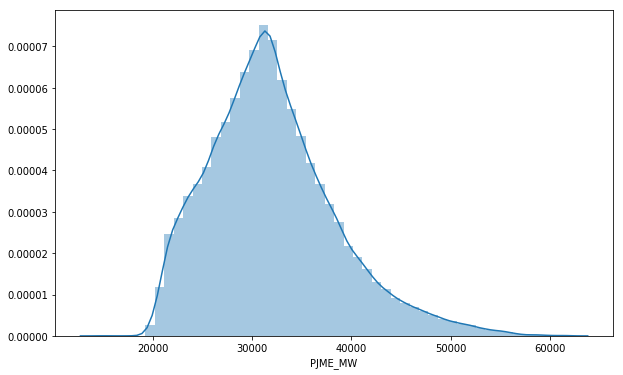

In [10]:
figure(figsize=(10, 6))
sns.distplot(df['PJME_MW'])

In [11]:
df['Year']=pd.to_datetime(df['Date']).dt.year

In [12]:
df.head()

,Datetime,PJME_MW,Date,Time,Year
0,2002-12-31 01:00:00,26498.0,2002-12-31,01:00:00,2002
1,2002-12-31 02:00:00,25147.0,2002-12-31,02:00:00,2002
2,2002-12-31 03:00:00,24574.0,2002-12-31,03:00:00,2002
3,2002-12-31 04:00:00,24393.0,2002-12-31,04:00:00,2002
4,2002-12-31 05:00:00,24860.0,2002-12-31,05:00:00,2002


In [13]:
df['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

#### Relation between Year and Energy

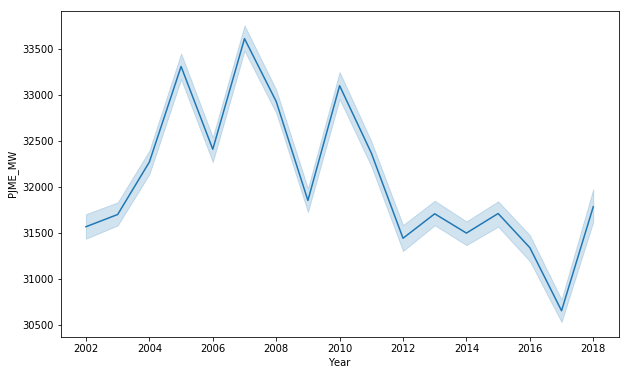

In [14]:
figure(figsize=(10, 6))
sns.lineplot(x=df['Year'],y=df['PJME_MW'],data=df)

#### To find the best fit line we will plot the regression

<Figure size 1080x576 with 0 Axes>

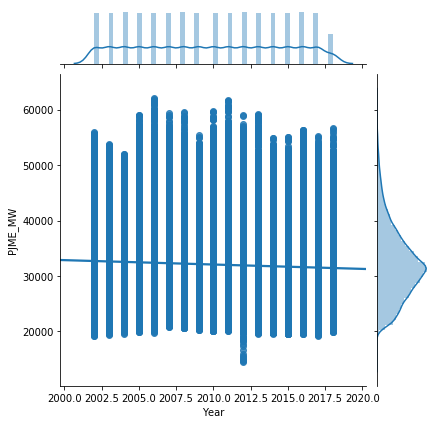

In [15]:
figure(figsize=(15, 8))
sns.jointplot(x=df["Year"],y=df["PJME_MW"],data=df,kind="reg")

#### We will find the kernel density estimate so we can see that were the data has most concentration 

<Figure size 1080x576 with 0 Axes>

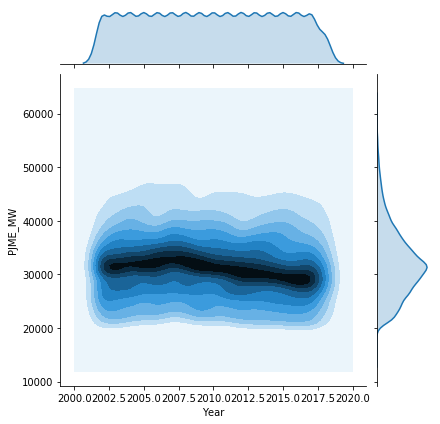

In [16]:
figure(figsize=(15, 8))
sns.jointplot(x=df["Year"],y=df["PJME_MW"],data=df,kind="kde")

#### Relation between Time and Energy

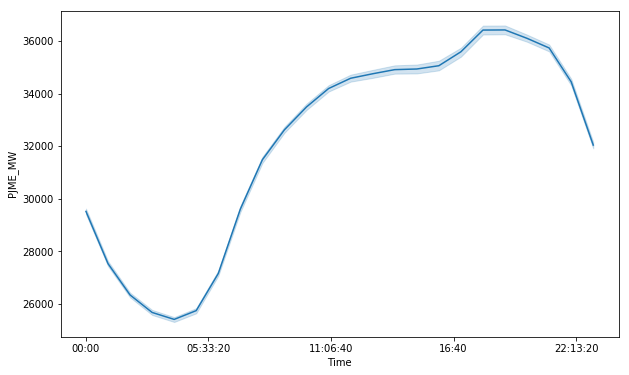

In [17]:
figure(figsize=(10, 6))
sns.lineplot(x=df['Time'],y=df['PJME_MW'],data=df)

In [18]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,PJME_MW,Date,Time,Year,Month,Week,Day
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,2002-12-31,01:00:00,2002,12,1,Tuesday
2002-12-31 02:00:00,25147.0,2002-12-31,02:00:00,2002,12,1,Tuesday
2002-12-31 03:00:00,24574.0,2002-12-31,03:00:00,2002,12,1,Tuesday
2002-12-31 04:00:00,24393.0,2002-12-31,04:00:00,2002,12,1,Tuesday
2002-12-31 05:00:00,24860.0,2002-12-31,05:00:00,2002,12,1,Tuesday


No handles with labels found to put in legend.


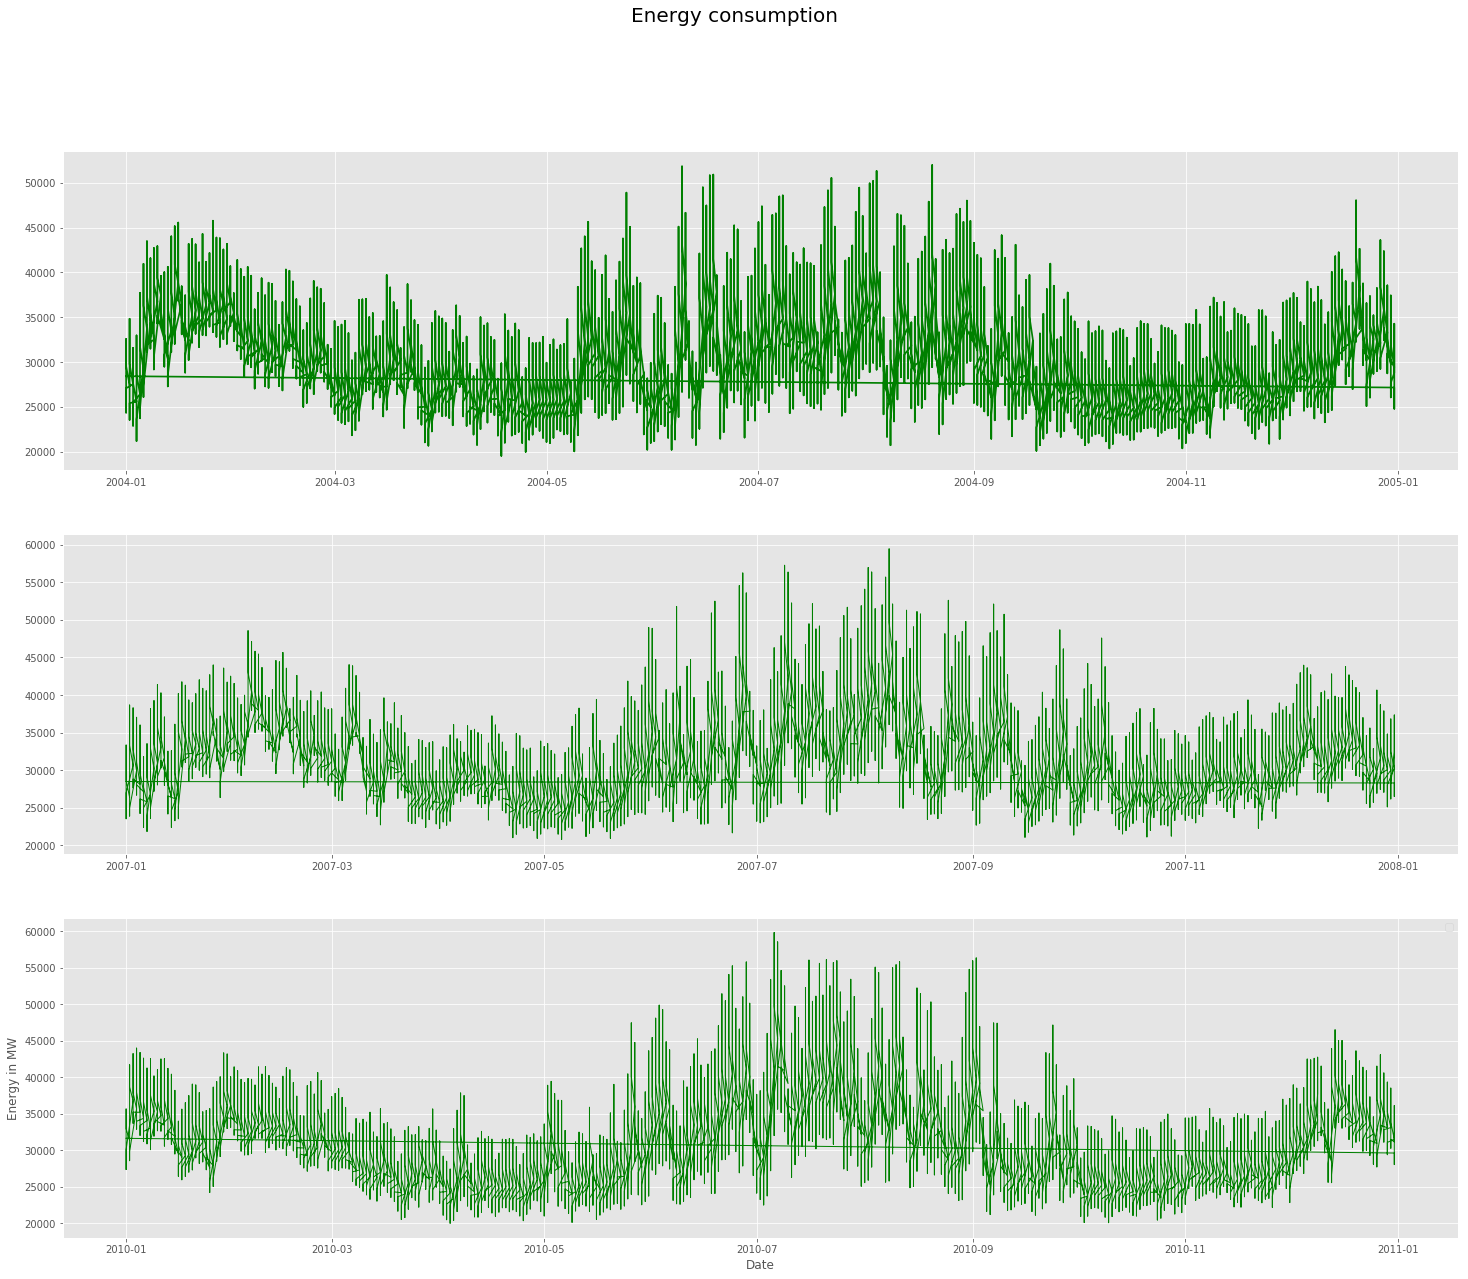

In [48]:
fig = plt.figure(figsize=(25,20))

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["PJME_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2007 = dataset["2007"]["PJME_MW"].to_list()
x_2007 = dataset["2007"]["Date"].to_list()
ax2.plot(x_2007, y_2007, color="green", linewidth=1)


y_2010 = dataset["2010"]["PJME_MW"].to_list()
x_2010 = dataset["2010"]["Date"].to_list()
ax3.plot(x_2010, y_2010, color="green", linewidth=1)


#plt.rcParams["figure.figsize"] = (20,10)
plt.suptitle("Energy consumption ",fontsize="20")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)

plt.legend()


### Resampling Data

In [20]:
#Aggregating the data on daily basis
NewDataSet=dataset.resample('D').mean()

In [21]:
print("Old Data Set Shape",dataset.shape)
print("New Data Set Shape",NewDataSet.shape)

Old Data Set Shape (145366, 7)
New Data Set Shape (6059, 4)


In [22]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [23]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (5999, 1)
Test Set Shape  (100, 4)


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [25]:
Training_Set = Training_Set.values
#print(Training_Set)
sc = MinMaxScaler(feature_range=(0, 1))
#print(sc)
Train = sc.fit_transform(Training_Set)
print(Train)

[[0.34847263]
 [0.44646169]
 [0.45417356]
 ...
 [0.41659746]
 [0.1941188 ]
 [0.22746544]]


In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(5939, 60, 1)
(5939, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(5939, 60, 1)

In [28]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
5939/5939 [==============================] - 18s 3ms/step - loss: 0.0176
Epoch 2/50
5939/5939 [==============================] - 16s 3ms/step - loss: 0.0132
Epoch 3/50
5939/5939 [==============================] - 14s 2ms/step - loss: 0.0127
Epoch 4/50
5939/5939 [==============================] - 15s 2ms/step - loss: 0.0121
Epoch 5/50
5939/5939 [==============================] - 14s 2ms/step - loss: 0.0114
Epoch 6/50
5939/5939 [==============================] - 14s 2ms/step - loss: 0.0112
Epoch 7/50
5939/5939 [==============================] - 14s 2ms/step - loss: 0.0108
Epoch 8/50
5939/5939 [==============================] - 15s 2ms/step - loss: 0.0104
Epoch 9/50
5939/5939 [==============================] - 15s 3ms/step - loss: 0.0091
Epoch 10/50
5939/5939 [==============================] - 15s 3ms/step - loss: 0.0073
Epoch 11/50
5939/5939 [==============================] - 15s 3ms/step - loss: 0.0065
Epoch 12/50
5939/5939 [==============================] - 18s 3ms/step - lo

#### Test Data 

In [30]:
TestData.head(2)

,PJME_MW,Year,Month,Week
Datetime,,,,
2018-04-26,25847.041667,2018,4,17
2018-04-27,26166.875000,2018,4,17


In [31]:
TestData.shape

(100, 4)

In [32]:
NewDataSet.shape

(6059, 4)

In [33]:
Df_Total = pd.concat((NewDataSet[["PJME_MW"]], TestData[["PJME_MW"]]), axis=0)

In [34]:
Df_Total.shape

(6159, 1)

In [35]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [36]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_mega_watts = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_mega_watt = sc.inverse_transform(predicted_mega_watts)

In [37]:
True_MegaWatt = TestData["PJME_MW"].to_list()
dates = TestData.index.to_list()

In [38]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in predicted_mega_watt ]
})

In [39]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,25847.041667,31740.773438
1,2018-04-27,26166.875000,26620.740234
2,2018-04-28,23777.708333,31518.087891
3,2018-04-29,23541.916667,26965.390625
4,2018-04-30,26895.333333,26346.242188
5,2018-05-01,26626.916667,28836.378906
6,2018-05-02,28349.666667,26388.449219
7,2018-05-03,32229.541667,27161.910156
8,2018-05-04,32975.291667,33463.011719
9,2018-05-05,26163.125000,32816.308594


In [40]:
True_MegaWatt = TestData["PJME_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in predicted_mega_watt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


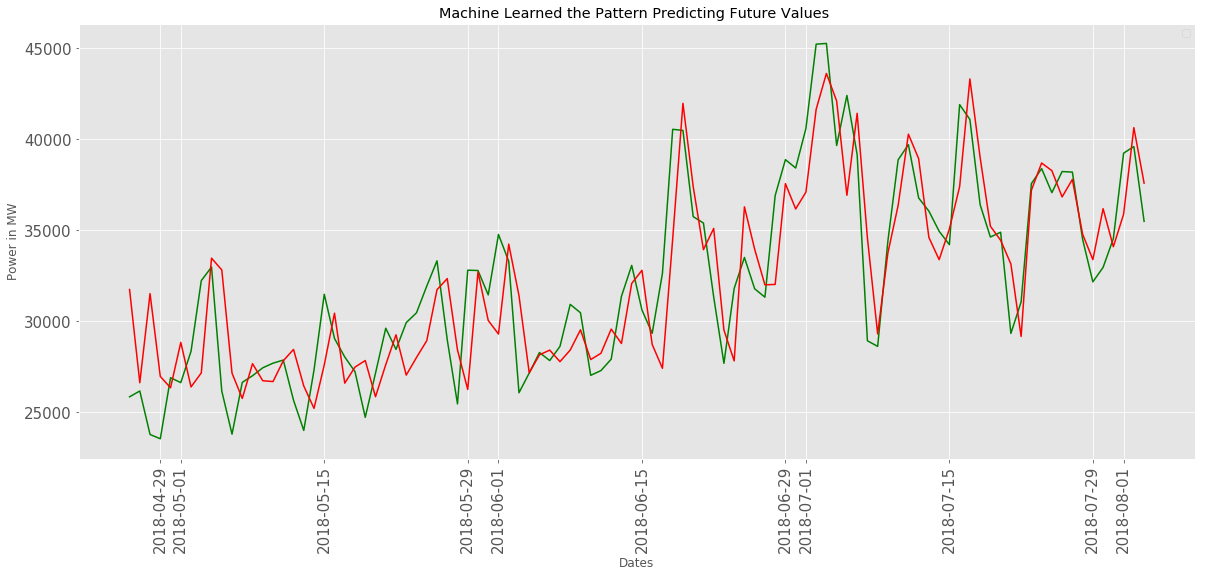

In [41]:
fig = plt.figure(figsize=(20,8))

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = predicted_mega_watt
plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
#plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.legend()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Mean Squared Error 

In [43]:
mean_squared_error(y_true=True_MegaWatt,
                   y_pred=predicted_mega_watt)

7777111.078608372

#### Mean Absolute Error 

In [44]:
mean_absolute_error(y_true=True_MegaWatt,
                   y_pred=predicted_mega_watt)

2194.2029036458334

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Mean Absolute Percentage Error

In [46]:
mean_absolute_percentage_error(y_true=True_MegaWatt,
                   y_pred=predicted_mega_watt)

17.66852245945368